#### In this final section, we are going to discuss the treatment of outliers in our data set.  But first, data custodial work.

In [1]:
install.packages("mlbench", repos = "http://cran.us.r-project.org")
install.packages("DataExplorer", repos = "http://cran.us.r-project.org")
install.packages("corrplot", repos = "http://cran.us.r-project.org")
install.packages("e1071", repos = "http://cran.us.r-project.org")
install.packages("usdm", repos = "http://cran.us.r-project.org")
library(tidyverse)
library(ggplot2)
library(pryr)
library(moments)
library(mlbench)
library(DataExplorer)
library(corrplot)
library(e1071)
library(usdm)

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
Loading tidyverse: ggplot2
Loading tidyverse: tibble
Loading tidyverse: tidyr
Loading tidyverse: readr
Loading tidyverse: purrr
Loading tidyverse: dplyr
Conflicts with tidy packages ---------------------------------------------------
filter(): dplyr, stats
lag():    dplyr, stats

Attaching package: ‘pryr’

The following objects are masked from ‘package:purrr’:

    compose, partial

corrplot 0.84 loaded

Attaching package: ‘e1071’

The following objects are masked from ‘package:moments’:

    kurtosis, moment, skewness

Loading required package: sp
Loading required package: raster

Attaching package: ‘r

In [2]:
BostonURL <- "https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data"
Boston <- read.csv(url(BostonURL), sep = "", header = FALSE)

In [3]:
colnames(Boston) <- c('Crime', 'LrgLots', 'IndAcr', 'River', 'NOX', 'Rms', 'OwnOcc', 'DistWork', 'HiwayAcc', 'PropTax', 'EdRat', 'Min', 'LowStatus', 'MedVal')

In [4]:
summary(Boston)
str(Boston)

     Crime             LrgLots           IndAcr          River        
 Min.   : 0.00632   Min.   :  0.00   Min.   : 0.46   Min.   :0.00000  
 1st Qu.: 0.08204   1st Qu.:  0.00   1st Qu.: 5.19   1st Qu.:0.00000  
 Median : 0.25651   Median :  0.00   Median : 9.69   Median :0.00000  
 Mean   : 3.61352   Mean   : 11.36   Mean   :11.14   Mean   :0.06917  
 3rd Qu.: 3.67708   3rd Qu.: 12.50   3rd Qu.:18.10   3rd Qu.:0.00000  
 Max.   :88.97620   Max.   :100.00   Max.   :27.74   Max.   :1.00000  
      NOX              Rms            OwnOcc          DistWork     
 Min.   :0.3850   Min.   :3.561   Min.   :  2.90   Min.   : 1.130  
 1st Qu.:0.4490   1st Qu.:5.886   1st Qu.: 45.02   1st Qu.: 2.100  
 Median :0.5380   Median :6.208   Median : 77.50   Median : 3.207  
 Mean   :0.5547   Mean   :6.285   Mean   : 68.57   Mean   : 3.795  
 3rd Qu.:0.6240   3rd Qu.:6.623   3rd Qu.: 94.08   3rd Qu.: 5.188  
 Max.   :0.8710   Max.   :8.780   Max.   :100.00   Max.   :12.127  
    HiwayAcc         PropTa

'data.frame':	506 obs. of  14 variables:
 $ Crime    : num  0.00632 0.02731 0.02729 0.03237 0.06905 ...
 $ LrgLots  : num  18 0 0 0 0 0 12.5 12.5 12.5 12.5 ...
 $ IndAcr   : num  2.31 7.07 7.07 2.18 2.18 2.18 7.87 7.87 7.87 7.87 ...
 $ River    : int  0 0 0 0 0 0 0 0 0 0 ...
 $ NOX      : num  0.538 0.469 0.469 0.458 0.458 0.458 0.524 0.524 0.524 0.524 ...
 $ Rms      : num  6.58 6.42 7.18 7 7.15 ...
 $ OwnOcc   : num  65.2 78.9 61.1 45.8 54.2 58.7 66.6 96.1 100 85.9 ...
 $ DistWork : num  4.09 4.97 4.97 6.06 6.06 ...
 $ HiwayAcc : int  1 2 2 3 3 3 5 5 5 5 ...
 $ PropTax  : num  296 242 242 222 222 222 311 311 311 311 ...
 $ EdRat    : num  15.3 17.8 17.8 18.7 18.7 18.7 15.2 15.2 15.2 15.2 ...
 $ Min      : num  397 397 393 395 397 ...
 $ LowStatus: num  4.98 9.14 4.03 2.94 5.33 ...
 $ MedVal   : num  24 21.6 34.7 33.4 36.2 28.7 22.9 27.1 16.5 18.9 ...


In [5]:
BostonNum <- Boston
BostonNum <- subset(BostonNum, select = c('Crime', 'LrgLots', 'IndAcr', 'NOX', 'Rms', 'OwnOcc', 'DistWork', 'PropTax', 'EdRat', 'Min', 'LowStatus', 'MedVal'))
summary(BostonNum)
str(BostonNum)

     Crime             LrgLots           IndAcr           NOX        
 Min.   : 0.00632   Min.   :  0.00   Min.   : 0.46   Min.   :0.3850  
 1st Qu.: 0.08204   1st Qu.:  0.00   1st Qu.: 5.19   1st Qu.:0.4490  
 Median : 0.25651   Median :  0.00   Median : 9.69   Median :0.5380  
 Mean   : 3.61352   Mean   : 11.36   Mean   :11.14   Mean   :0.5547  
 3rd Qu.: 3.67708   3rd Qu.: 12.50   3rd Qu.:18.10   3rd Qu.:0.6240  
 Max.   :88.97620   Max.   :100.00   Max.   :27.74   Max.   :0.8710  
      Rms            OwnOcc          DistWork         PropTax     
 Min.   :3.561   Min.   :  2.90   Min.   : 1.130   Min.   :187.0  
 1st Qu.:5.886   1st Qu.: 45.02   1st Qu.: 2.100   1st Qu.:279.0  
 Median :6.208   Median : 77.50   Median : 3.207   Median :330.0  
 Mean   :6.285   Mean   : 68.57   Mean   : 3.795   Mean   :408.2  
 3rd Qu.:6.623   3rd Qu.: 94.08   3rd Qu.: 5.188   3rd Qu.:666.0  
 Max.   :8.780   Max.   :100.00   Max.   :12.127   Max.   :711.0  
     EdRat            Min           LowSt

'data.frame':	506 obs. of  12 variables:
 $ Crime    : num  0.00632 0.02731 0.02729 0.03237 0.06905 ...
 $ LrgLots  : num  18 0 0 0 0 0 12.5 12.5 12.5 12.5 ...
 $ IndAcr   : num  2.31 7.07 7.07 2.18 2.18 2.18 7.87 7.87 7.87 7.87 ...
 $ NOX      : num  0.538 0.469 0.469 0.458 0.458 0.458 0.524 0.524 0.524 0.524 ...
 $ Rms      : num  6.58 6.42 7.18 7 7.15 ...
 $ OwnOcc   : num  65.2 78.9 61.1 45.8 54.2 58.7 66.6 96.1 100 85.9 ...
 $ DistWork : num  4.09 4.97 4.97 6.06 6.06 ...
 $ PropTax  : num  296 242 242 222 222 222 311 311 311 311 ...
 $ EdRat    : num  15.3 17.8 17.8 18.7 18.7 18.7 15.2 15.2 15.2 15.2 ...
 $ Min      : num  397 397 393 395 397 ...
 $ LowStatus: num  4.98 9.14 4.03 2.94 5.33 ...
 $ MedVal   : num  24 21.6 34.7 33.4 36.2 28.7 22.9 27.1 16.5 18.9 ...


#### We want to apply Tukey's Method to the original data set to identify the outliers and get an understanding of how prevalent they are in numbers.  We can see their effect statistically -- the data are not normally distributed and most exhibit large degrees of skew.  The outliers are pulling the shape of the distribution away from normality.

#### So we want to apply Tukey's Method to see if it can help us understand how to deal with the outliers.

#### We have seen Tukey's Method applied throughout this study, primarily in the use of boxplots.  Tukey's definition of an outlier is any value that lies outside the range bounded by  *+ / - 1.5 x IQR*.

#### A function was used to analyze the original data set and to make the calculations.

In [6]:
Outliers <- function(dt, var) {
        var_name <- eval(substitute(var), eval(dt))
        na1 <- sum(is.na(var_name))
        m1 <- mean(var_name, na.rm = TRUE)
        par(mfrow = c(2, 2), oma = c(0, 0, 3, 0))
        boxplot(var_name, main = 'Original Data with Outliers')
        hist(var_name, main = 'Original Data with Outliers', xlab = NA, ylab = NA)
        outlier <- boxplot.stats(var_name)$out
        mo <- mean(outlier)
        var_name <- ifelse(var_name %in% outlier, NA, var_name)
        boxplot(var_name, main = 'Original Data without Outliers')
        hist(var_name, main = 'Original Data without Outliers', xlab = NA, ylab = NA)
        title('Checking for Outliers Using Tukey Method', outer = TRUE)
        na2 <- sum(is.na(var_name))
        cat('Outliers Identified:', na2 - na1, "\n")
        cat('Percentage Outliers:', round((na2 - na1) / sum(!is.na(var_name)) * 100, 1), "\n")
}

#### The data were run through the function.  The results are tablulated below.  The graphs illustrate the data set feature with and without outliers, so we can see the impact they have on each feature.

Outliers Identified: 66 
Percentage Outliers: 15 


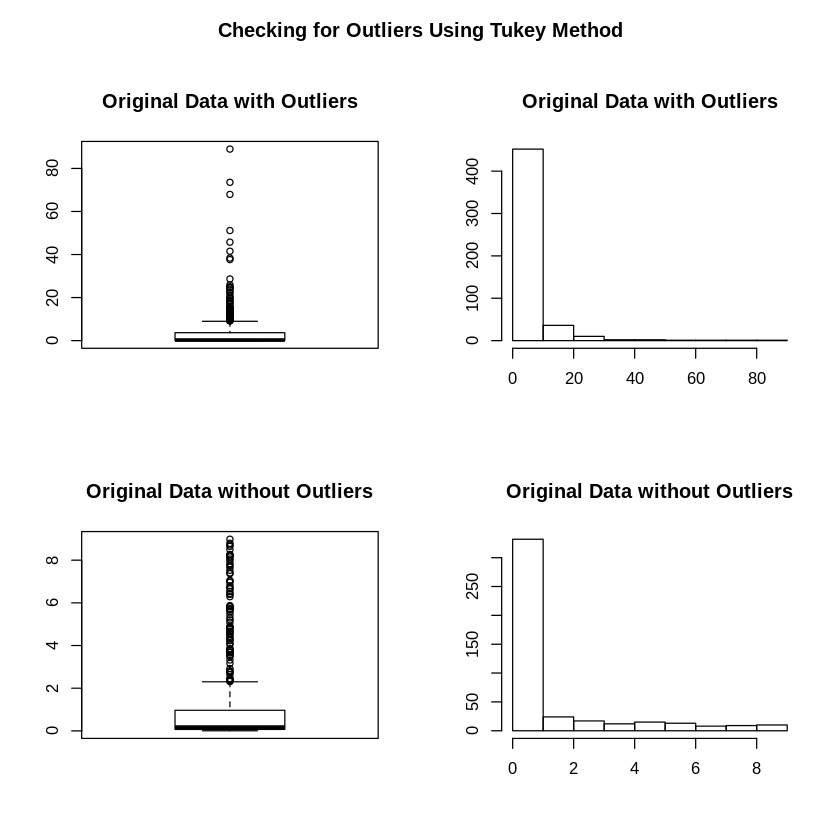

In [7]:
Outliers(BostonNum, Crime)

Outliers Identified: 68 
Percentage Outliers: 15.5 


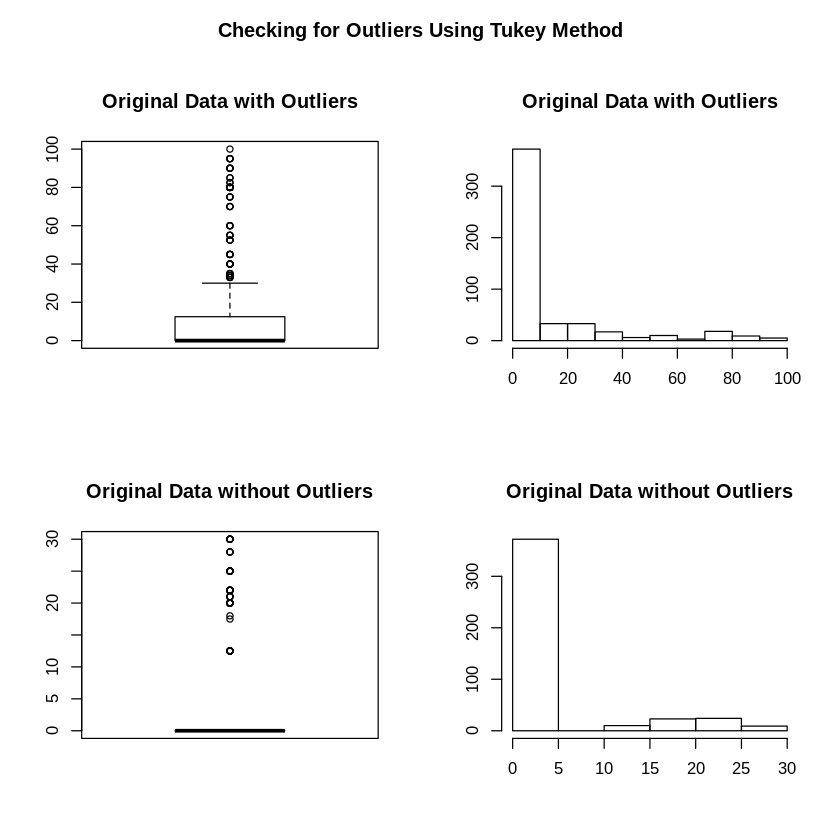

In [8]:
Outliers(BostonNum, LrgLots)

Outliers Identified: 0 
Percentage Outliers: 0 


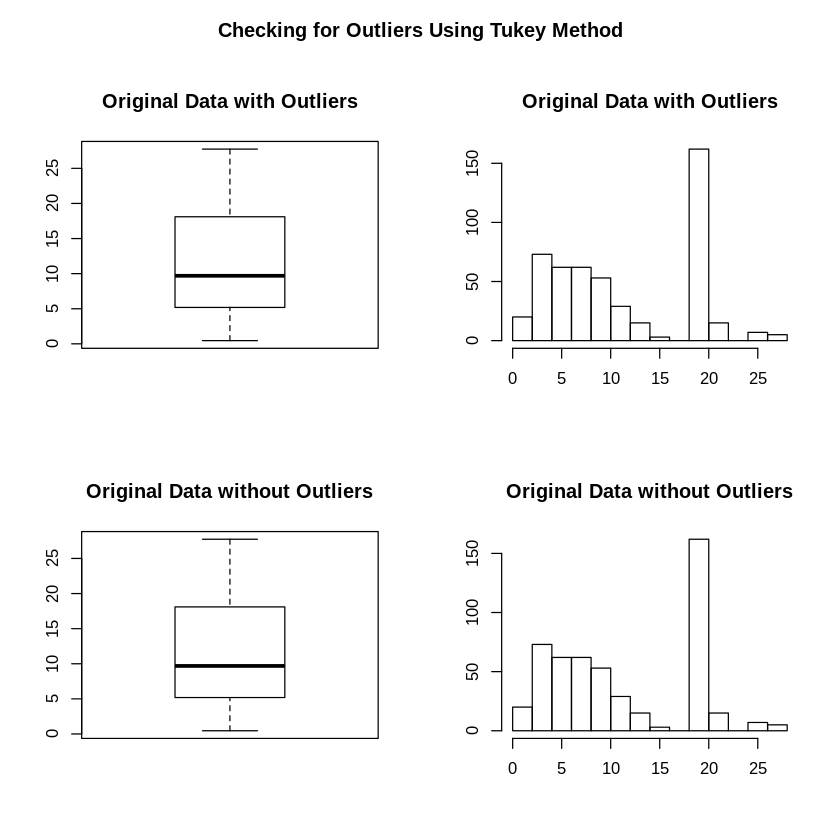

In [9]:
Outliers(BostonNum, IndAcr)

Outliers Identified: 0 
Percentage Outliers: 0 


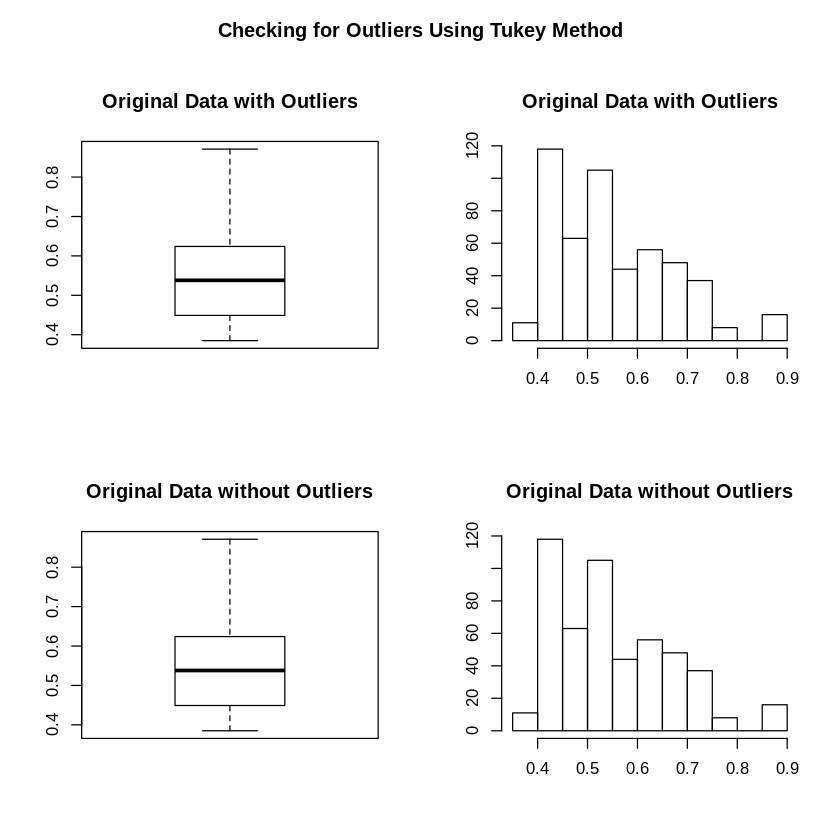

In [10]:
Outliers(BostonNum, NOX)

Outliers Identified: 30 
Percentage Outliers: 6.3 


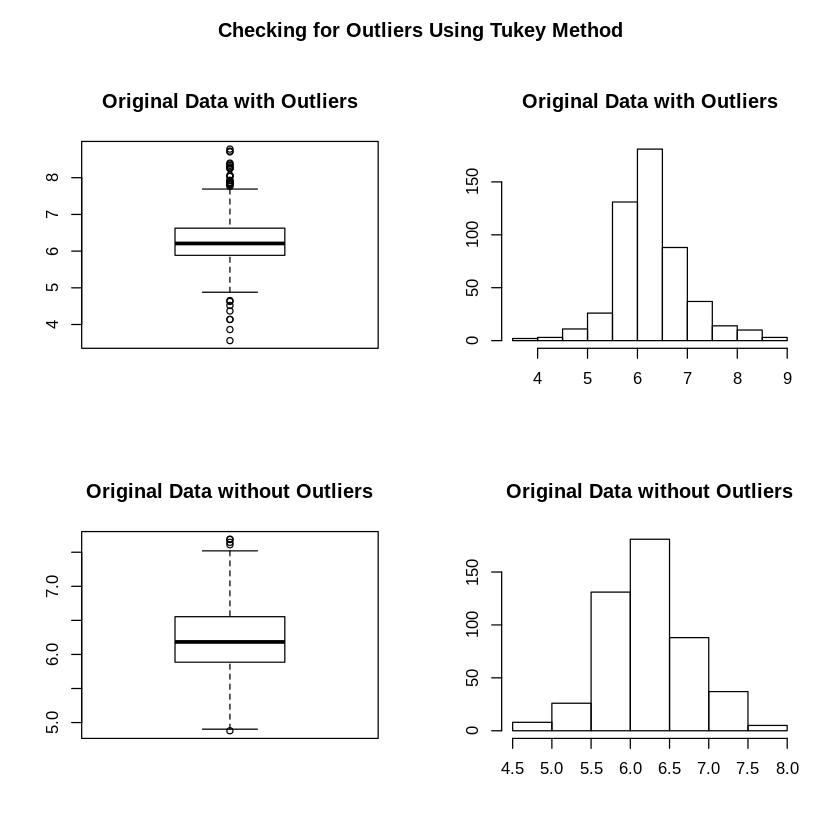

In [11]:
Outliers(BostonNum, Rms)

Outliers Identified: 0 
Percentage Outliers: 0 


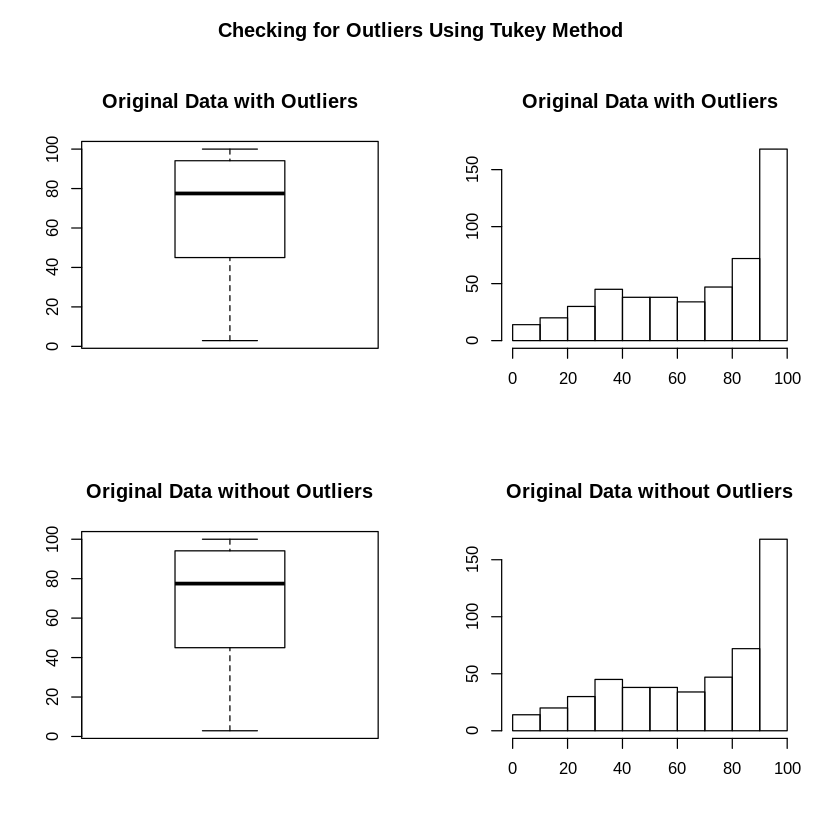

In [12]:
Outliers(BostonNum, OwnOcc)

Outliers Identified: 5 
Percentage Outliers: 1 


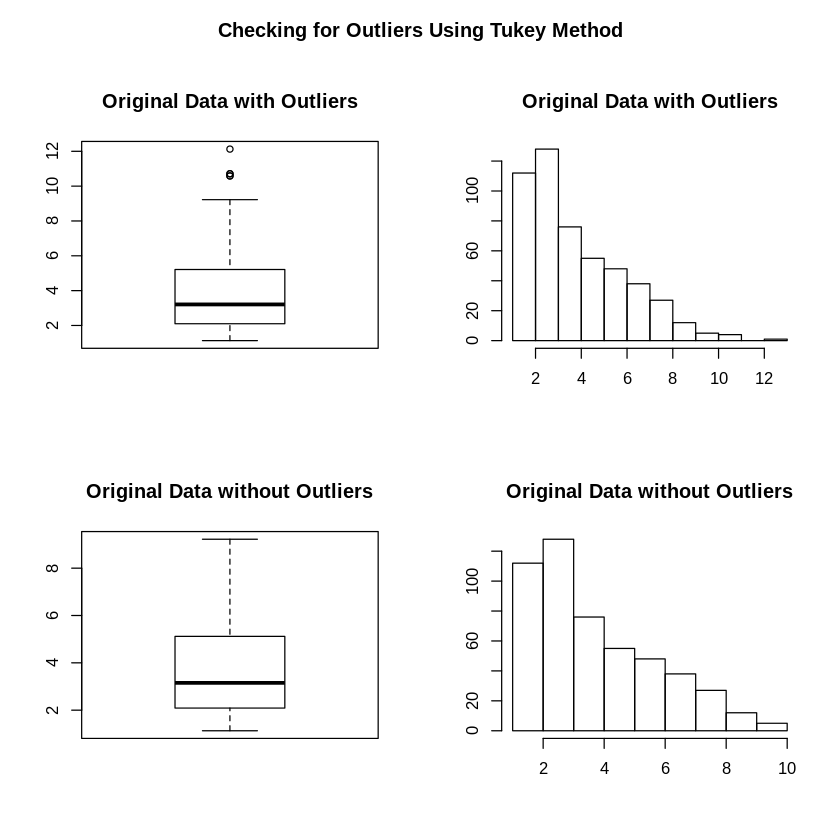

In [13]:
Outliers(BostonNum, DistWork)

Outliers Identified: 0 
Percentage Outliers: 0 


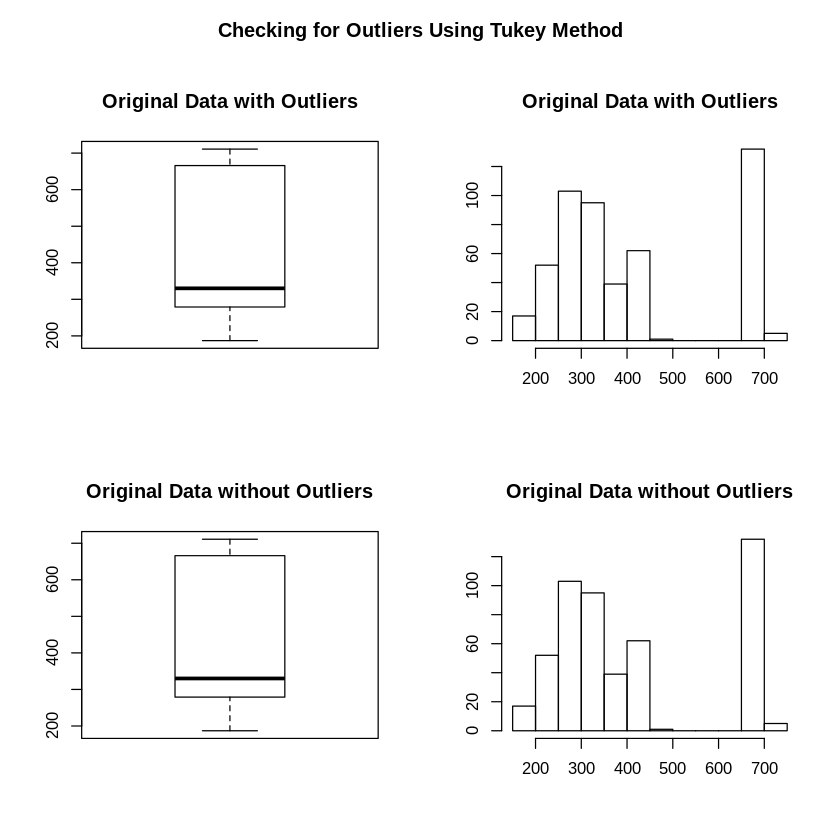

In [14]:
Outliers(BostonNum, PropTax)

Outliers Identified: 15 
Percentage Outliers: 3.1 


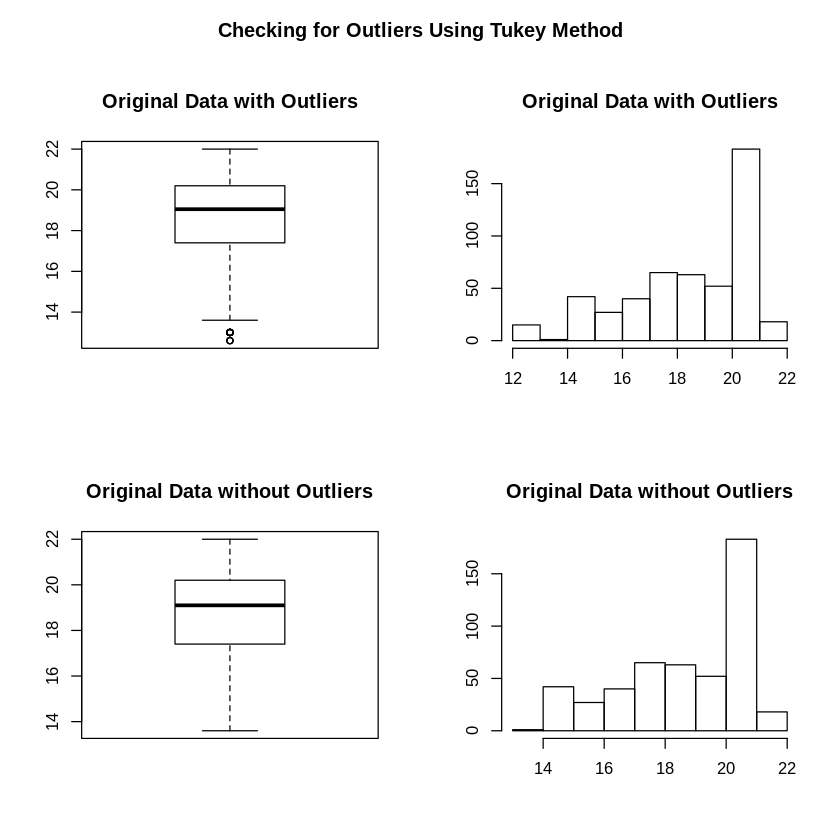

In [15]:
Outliers(BostonNum, EdRat)

Outliers Identified: 76 
Percentage Outliers: 17.7 


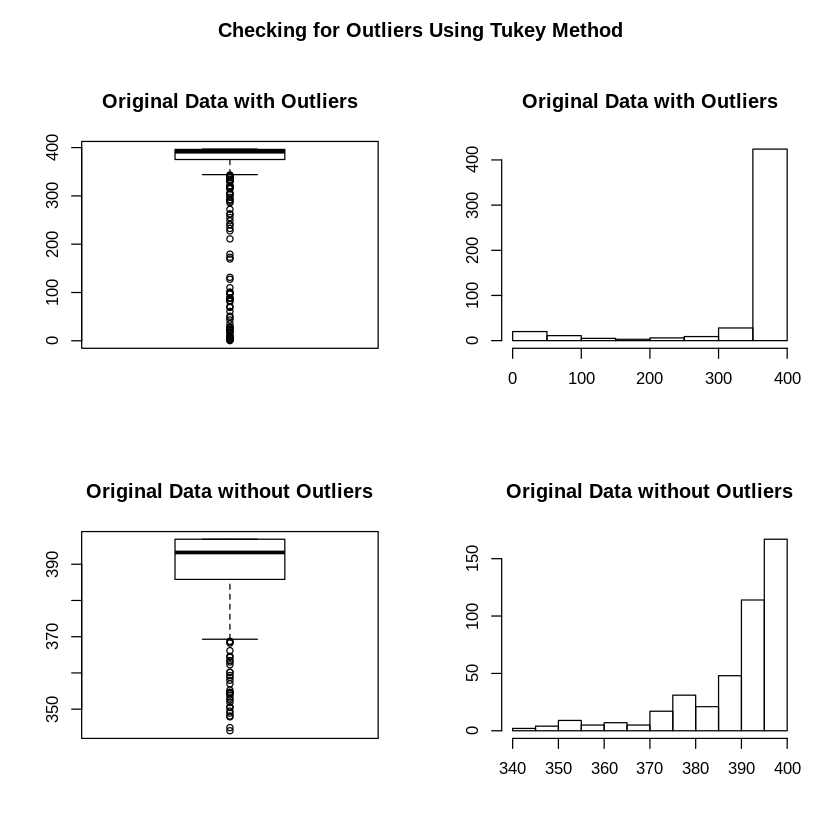

In [16]:
Outliers(BostonNum, Min)

Outliers Identified: 6 
Percentage Outliers: 1.2 


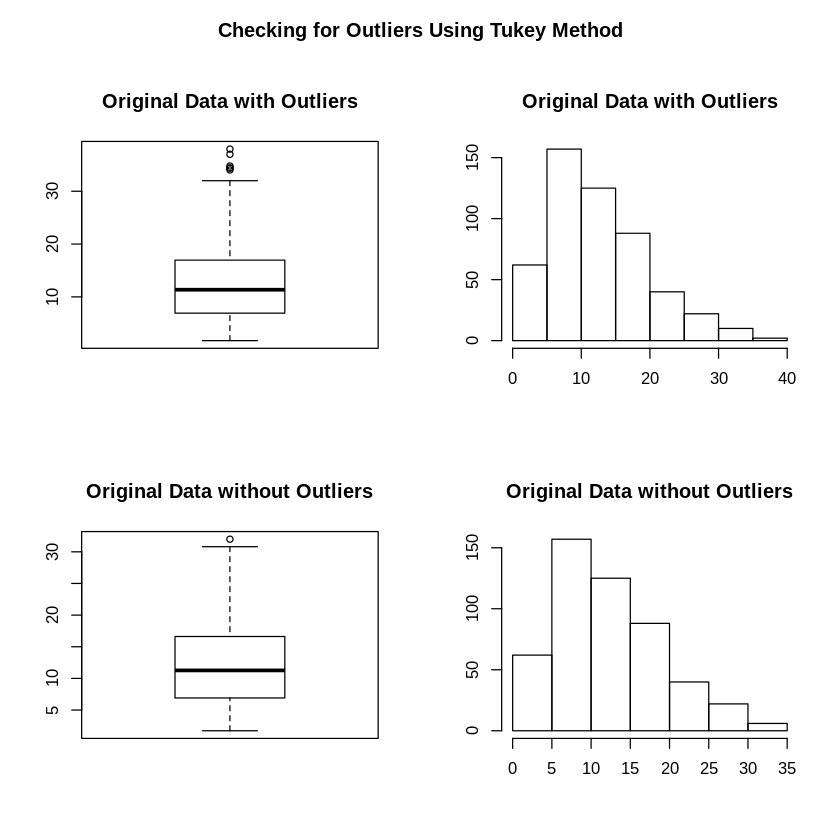

In [17]:
Outliers(BostonNum, LowStatus)

Outliers Identified: 37 
Percentage Outliers: 7.9 


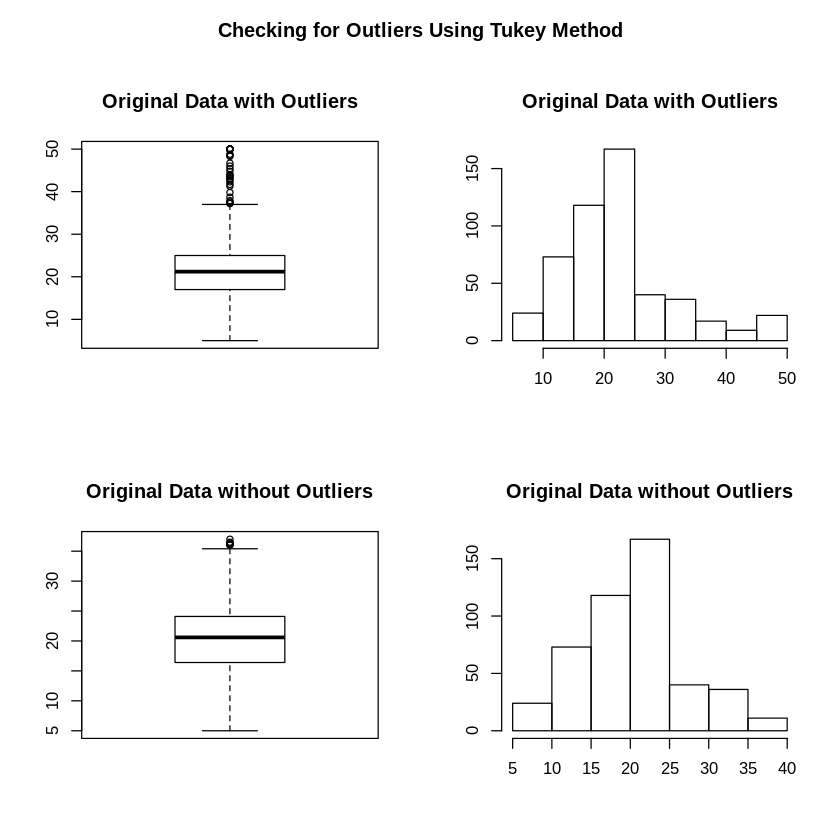

In [18]:
Outliers(BostonNum, MedVal)

#### Overall, just 4% of our data consists of outliers, which suggests we might just remove them altogether.  On the other hand, several features have no outliers, but they exhibit skew.  So we know they are not normally distributed.  This suggests we should find a more appropriate distribution model for the data.  